In [35]:
! git clone https://github.com/garethgeorge/pulse2percept.git

Cloning into 'pulse2percept'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3577 (delta 2), reused 8 (delta 2), pack-reused 3565
Receiving objects: 100% (3577/3577), 281.91 MiB | 10.71 MiB/s, done.
Resolving deltas: 100% (2205/2205), done.


In [1]:
! pip uninstall pulse2percept -y
! cd pulse2percept && pip install -r requirements.txt && pip install -r requirements-dev.txt && pip install -e .

Obtaining file:///home/jovyan/work/pulse2percept
  Running setup.py develop for pulse2percept


In [4]:
import pulse2percept as p2p
from prima import * 
%matplotlib inline 
import matplotlib.pyplot as plt 

<class 'prima.Prima'>


# Plot Basic Layout for Prima Implant

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f12b1498978>)

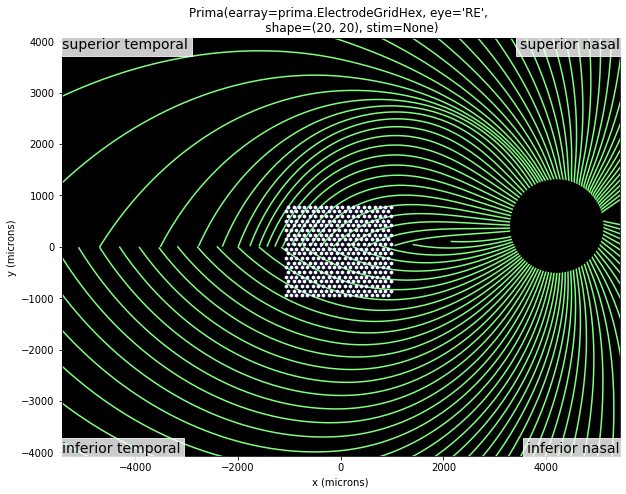

In [34]:
implant = Prima(x=-50, y=50, rot=np.deg2rad(0))
plot_implant_on_axon_map(
    implant, annotate_implant=False, marker_style='hw')

## Experimenting with Scoreboard model for Prima Implant

In [13]:
import numpy as np
from pulse2percept.implants import ArgusII
from pulse2percept.models import ScoreboardModel
from prima import Prima

In [14]:
model = ScoreboardModel(rho=100)
model.engine = 'serial'
model.build()

ScoreboardModel(engine='serial', grid_type='rectangular', 
                n_jobs=-1, rho=100, scheduler='threading', 
                thresh_percept=0.6065306597126334, 
                verbose=True, xrange=(-20, 20), 
                xystep=0.25, yrange=(-15, 15))

In [15]:
implant = Prima()
implant.stim = 10 * np.ones(400)
percept = model.predict_percept(implant)

Text(0.5, 1.0, 'Predicted percept')

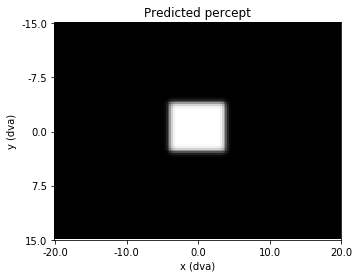

In [16]:
plt.imshow(percept, cmap='gray')
plt.xticks(np.linspace(0, percept.shape[1], num=5),
           np.linspace(*model.xrange, num=5))
plt.xlabel('x (dva)')
plt.yticks(np.linspace(0, percept.shape[0], num=5),
           np.linspace(*model.yrange, num=5))
plt.ylabel('y (dva)')
plt.title('Predicted percept')

## Experimenting with Axon Map model

### For Prima Implant

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from pulse2percept.viz import plot_implant_on_axon_map
from pulse2percept.implants import ArgusII
from pulse2percept.models import AxonMapModel
from prima import Prima

In [20]:
model = AxonMapModel(rho=100, axlambda=200)
model.engine = 'serial'
model.build()

AxonMapModel(ax_segments_range=(3, 50), axlambda=200, 
             axon_pickle='axons.pickle', 
             axons_range=(-180, 180), engine='serial', 
             eye='RE', grid_type='rectangular', 
             ignore_pickle=False, loc_od_x=15.5, 
             loc_od_y=1.5, n_ax_segments=500, n_axons=500, 
             n_jobs=-1, rho=100, scheduler='threading', 
             thresh_percept=0, verbose=True, 
             xrange=(-20, 20), xystep=0.25, 
             yrange=(-15, 15))

In [21]:
implant = Prima()
implant.stim = np.ones(400)
percept = model.predict_percept(implant)

Done...


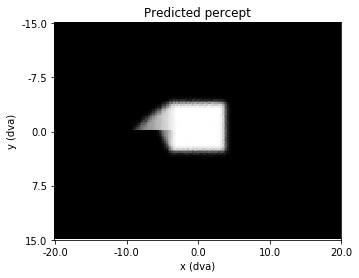

In [22]:
plt.imshow(percept, cmap='gray')
plt.xticks(np.linspace(0, percept.shape[1], num=5),
           np.linspace(*model.xrange, num=5))
plt.xlabel('x (dva)')
plt.yticks(np.linspace(0, percept.shape[0], num=5),
           np.linspace(*model.yrange, num=5))
plt.ylabel('y (dva)')
plt.title('Predicted percept')
print("Done...")

for the letter a...

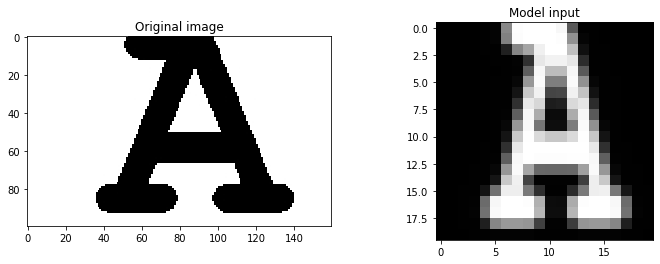

In [23]:
import skimage.io as sio
import skimage.transform as sit
invert = True
datafile = 'letters/A.jpg'
img_in = sio.imread(datafile, as_gray=True)
img_in = img_in[50:150, 40:200]
img_stim = sit.resize(img_in, (20, 20))
if invert:
    img_stim = 1.0 - img_stim
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(img_in, cmap='gray')
plt.title('Original image')
# print(img_in.shape)
plt.subplot(122)
plt.imshow(img_stim, cmap='gray')
#print(img_stim)
plt.title('Model input');

Done...


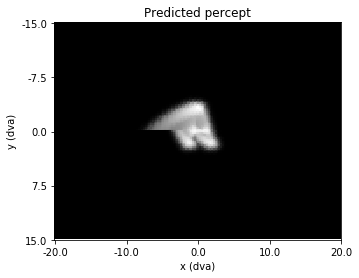

In [24]:
implant = Prima()
implant.stim = np.array(img_stim).flatten()
percept = model.predict_percept(implant)
plt.imshow(percept, cmap='gray')
plt.xticks(np.linspace(0, percept.shape[1], num=5),
           np.linspace(*model.xrange, num=5))
plt.xlabel('x (dva)')
plt.yticks(np.linspace(0, percept.shape[0], num=5),
           np.linspace(*model.yrange, num=5))
plt.ylabel('y (dva)')
plt.title('Predicted percept')
print("Done...")

### For ArgusII

In [25]:
from pulse2percept.implants import ArgusII
implant = ArgusII()
implant.stim = np.ones(60)
percept = model.predict_percept(implant)

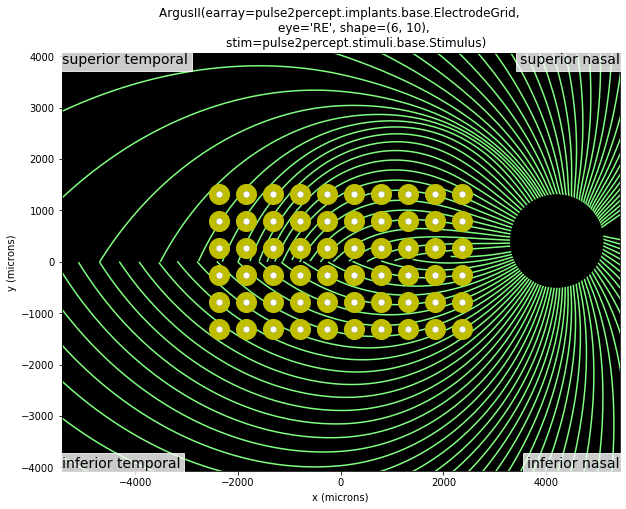

In [26]:
_1, _ = plot_implant_on_axon_map(
    implant, annotate_implant=False, marker_style='hw')

Text(0.5, 1.0, 'Predicted percept')

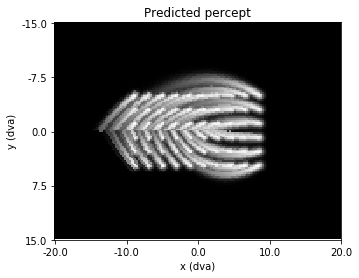

In [27]:
plt.imshow(percept, cmap='gray')
plt.xticks(np.linspace(0, percept.shape[1], num=5),
           np.linspace(*model.xrange, num=5))
plt.xlabel('x (dva)')
plt.yticks(np.linspace(0, percept.shape[0], num=5),
           np.linspace(*model.yrange, num=5))
plt.ylabel('y (dva)')
plt.title('Predicted percept')

stimulus for representing the letter A

In [28]:
# for the letter A
implant.stim = np.array([[0.00392157,0.00784314,0.04346405,0.49673203,0.86928105,0.93202614
,0.37058824,0.01535948,0.00784314,0.00392157]
,[0.00392157,0.00784314,0.00784314,0.10784314,0.66764706,0.65784314
,0.62156863,0.06862745,0.00784314,0.00392157]
,[0.00392157,0.00784314,0.00980392,0.25130719,0.72418301,0.33398693
,0.72254902,0.24411765,0.00980392,0.00784314]
,[0.00392157,0.00784314,0.04052288,0.54803922,0.83267974,0.71699346
,0.82875817,0.54575163,0.04084967,0.00784314]
,[0.00784314,0.01960784,0.28039216,0.79313725,0.50588235,0.20980392
,0.49901961,0.79215686,0.28431373,0.01960784]
,[0.00784314,0.02712418,0.35882353,0.5875817,0.42679739,0.08954248
,0.42287582,0.5875817,0.35915033,0.02712418]]).flatten()
percept = model.predict_percept(implant)

Text(0.5, 1.0, 'Predicted percept')

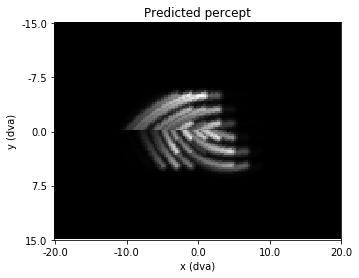

In [29]:
plt.imshow(percept, cmap='gray')
plt.xticks(np.linspace(0, percept.shape[1], num=5),
           np.linspace(*model.xrange, num=5))
plt.xlabel('x (dva)')
plt.yticks(np.linspace(0, percept.shape[0], num=5),
           np.linspace(*model.yrange, num=5))
plt.ylabel('y (dva)')
plt.title('Predicted percept')

# Evaluation of Prima Implant

 - use PCA to sample the N-dimensional image space, estimate how many effective electrodes we have, use PCA to estimate the effective nmber of electrodes
 - tweak rho and lambda to modify the dimensionality 